In [1]:
import torch
import sys
sys.path.append('../')
from lucent_edited.optvis import render
from lucent_edited.modelzoo import inceptionv1
from lucent_edited.modelzoo.util import get_model_layers
from torchvision import models

In [2]:
from lucent_edited.optvis import render, param, transform, objectives

In [3]:
#fetch command line argument (prepped model)
#%reset
import sys
import os
from copy import deepcopy
import pickle
import torch
import plotly.offline as py
import plotly.graph_objs as go


sys.path.insert(0, os.path.abspath('./prep_model_scripts/'))
sys.path.insert(0, os.path.abspath('./visualizer_scripts/'))
from visualizer_helper_functions import *
from contrast_helper_functions import *
from featureviz_helper_functions import *
from dissected_Conv2d import *
from copy import deepcopy


py.init_notebook_mode(connected=True)   #jupyter notebook only

prepped_model_folder = 'alexnet'    #set this to a subfolder of prunned_models

full_prepped_model_folder = os.path.abspath('prepped_models/%s'%prepped_model_folder)

possible_models = os.listdir('prepped_models')
print('possible models to visualizer are:')
print(possible_models)

print('\nYou\'ve chosen to visualize %s'%prepped_model_folder)


sys.path.insert(0,'prepped_models/%s'%prepped_model_folder)

import prep_model_params_used as prep_model_params

params = {}
params['prepped_model'] = prepped_model_folder
params['prepped_model_path'] = full_prepped_model_folder

possible models to visualizer are:
['mnist_resize', 'alexnet_old.tar.gz', 'mnist_old', '.keep', 'mnist', 'old', 'alexnet10', 'letter_mixed_not_trained', 'imagenet10_sparse', 'alexnet_sparse_test', '.DS_Store', 'alexnet_sparse_full_model_10classes', 'imagenet10', 'alexnet_sparse', 'alexnet_lucent', 'mnist.tgz', 'alexnet', 'letter_mixed', 'googlenet10_test', '._.DS_Store', 'alexnet_corrupted', 'alexnet.tar.gz']

You've chosen to visualize alexnet


In [4]:
#load Model

model_dis = dissect_model(deepcopy(prep_model_params.model),store_activations=False,store_ranks=False,clear_ranks=False,cuda=True) #version of model with accessible preadd activations in Conv2d modules 

model_dis.cuda()
model_dis = model_dis.eval()

print('loaded model:')
print(prep_model_params.model)
        
#del prep_model_params.model


loaded model:
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096

In [5]:
model = prep_model_params.model
model = model.to('cuda')
model = model.eval()

In [6]:
model2 = prep_model_params.model
model2.to('cuda')

from lucent_edited.modelzoo import alexnet
import lucent_edited

model = lucent_edited.modelzoo.alexnet(pretrained=True)
model.to('cuda')

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/home/chris/miniconda3/envs/pruning_viz/lib/python3.6/site-packages/lucent_edited/optvis/param/spatial.py:57: UserWarning:

The function torch.irfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.ifft or torch.fft.irfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:602.)

  2%|▏         | 10/512 [00:00<00:05, 98.78it/s]

0
Initial loss: -0.000


 99%|█████████▊| 505/512 [00:04<00:00, 105.55it/s]

Loss at step 512: -188.199



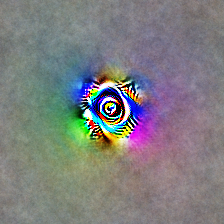

100%|██████████| 512/512 [00:04<00:00, 104.83it/s]



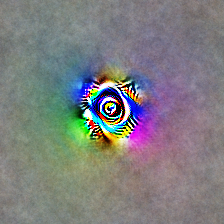

  2%|▏         | 11/512 [00:00<00:04, 106.18it/s]

Initial loss: -0.000


100%|█████████▉| 511/512 [00:04<00:00, 106.22it/s]

Loss at step 512: -103.007



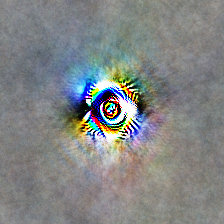

100%|██████████| 512/512 [00:04<00:00, 106.04it/s]



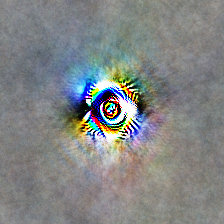

  2%|▏         | 11/512 [00:00<00:04, 105.86it/s]

1
Initial loss: -0.000


 99%|█████████▉| 506/512 [00:04<00:00, 101.44it/s]

Loss at step 512: -206.413



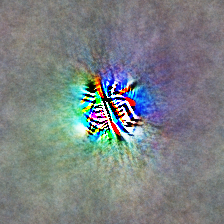

100%|██████████| 512/512 [00:04<00:00, 103.75it/s]



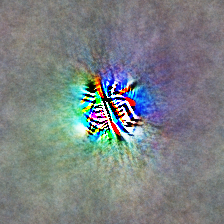

  3%|▎         | 13/512 [00:00<00:04, 122.73it/s]

Initial loss: -0.000


 98%|█████████▊| 500/512 [00:03<00:00, 133.32it/s]

Loss at step 512: -246.939



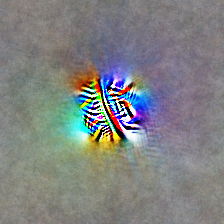

100%|██████████| 512/512 [00:03<00:00, 133.03it/s]



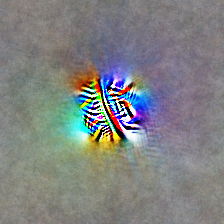

  3%|▎         | 14/512 [00:00<00:03, 132.13it/s]

2
Initial loss: -0.135


 98%|█████████▊| 504/512 [00:03<00:00, 134.07it/s]

Loss at step 512: -116.416



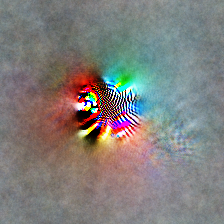

100%|██████████| 512/512 [00:03<00:00, 134.22it/s]



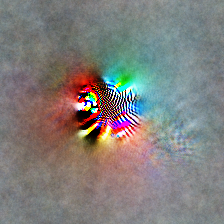

  3%|▎         | 14/512 [00:00<00:03, 131.88it/s]

Initial loss: -0.000


 99%|█████████▉| 508/512 [00:04<00:00, 125.26it/s]

Loss at step 512: -92.469



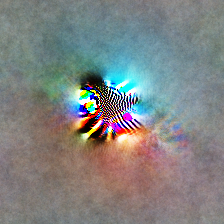

100%|██████████| 512/512 [00:04<00:00, 125.36it/s]



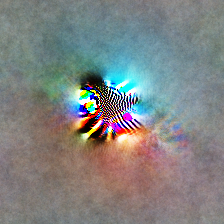

  3%|▎         | 13/512 [00:00<00:04, 124.26it/s]

3
Initial loss: -0.000


 98%|█████████▊| 502/512 [00:04<00:00, 111.59it/s]

Loss at step 512: -0.000



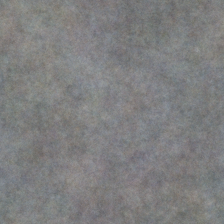

100%|██████████| 512/512 [00:04<00:00, 109.37it/s]



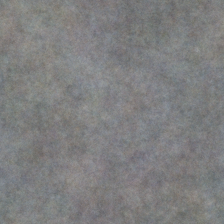

  2%|▏         | 10/512 [00:00<00:05, 99.03it/s]

Initial loss: -0.000


 98%|█████████▊| 502/512 [00:04<00:00, 100.36it/s]

Loss at step 512: -0.000



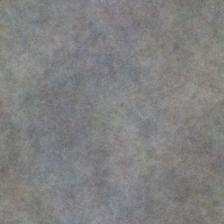

100%|██████████| 512/512 [00:04<00:00, 108.05it/s]



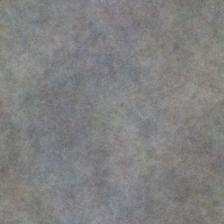

  2%|▏         | 8/512 [00:00<00:06, 77.94it/s]

4
Initial loss: -0.000


100%|█████████▉| 511/512 [00:03<00:00, 132.54it/s]

Loss at step 512: -0.000



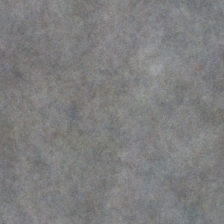

100%|██████████| 512/512 [00:03<00:00, 129.37it/s]



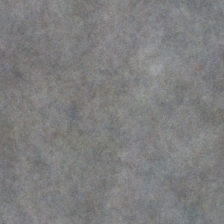

  3%|▎         | 14/512 [00:00<00:03, 131.83it/s]

Initial loss: -0.000


 98%|█████████▊| 504/512 [00:03<00:00, 132.52it/s]

Loss at step 512: -0.000



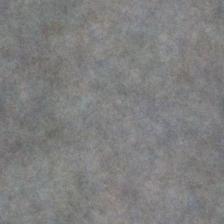

100%|██████████| 512/512 [00:03<00:00, 133.18it/s]



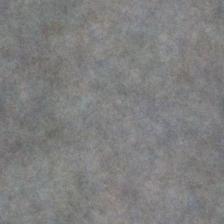

  3%|▎         | 13/512 [00:00<00:04, 123.81it/s]

5
Initial loss: -0.000


 98%|█████████▊| 501/512 [00:04<00:00, 118.16it/s]

Loss at step 512: -23.150



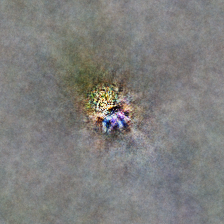

100%|██████████| 512/512 [00:04<00:00, 110.85it/s]



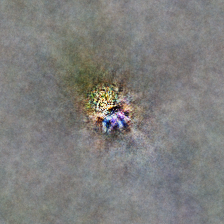

  3%|▎         | 14/512 [00:00<00:03, 131.16it/s]

Initial loss: -0.000


100%|█████████▉| 511/512 [00:04<00:00, 109.82it/s]

Loss at step 512: -125.330



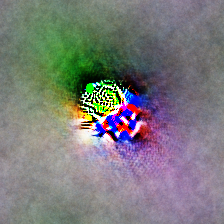

100%|██████████| 512/512 [00:04<00:00, 108.20it/s]



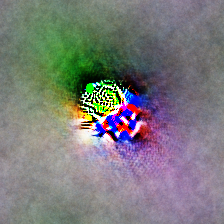

  2%|▏         | 12/512 [00:00<00:04, 113.13it/s]

6
Initial loss: -0.000


 99%|█████████▉| 508/512 [00:04<00:00, 109.09it/s]

Loss at step 512: -0.000



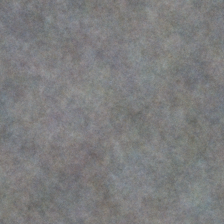

100%|██████████| 512/512 [00:04<00:00, 109.12it/s]



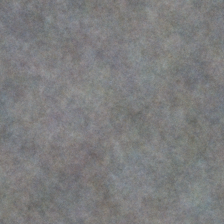

  2%|▏         | 11/512 [00:00<00:04, 106.42it/s]

Initial loss: -0.000


 98%|█████████▊| 501/512 [00:04<00:00, 107.38it/s]

Loss at step 512: -0.000



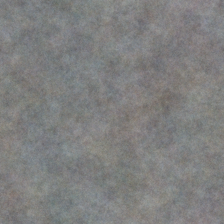

100%|██████████| 512/512 [00:04<00:00, 107.86it/s]



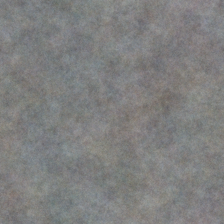

  2%|▏         | 12/512 [00:00<00:04, 113.39it/s]

7
Initial loss: -0.000


 98%|█████████▊| 502/512 [00:04<00:00, 112.41it/s]

Loss at step 512: -0.000



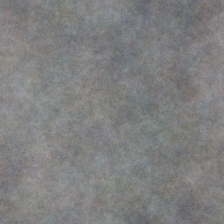

100%|██████████| 512/512 [00:04<00:00, 105.15it/s]



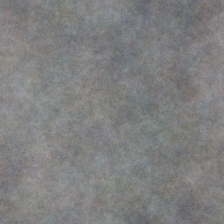

  2%|▏         | 11/512 [00:00<00:04, 109.26it/s]

Initial loss: -0.000


 99%|█████████▊| 505/512 [00:04<00:00, 110.76it/s]

Loss at step 512: -0.000



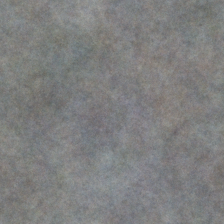

100%|██████████| 512/512 [00:04<00:00, 107.57it/s]



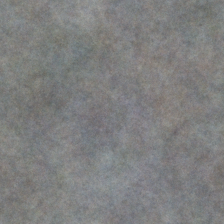

  2%|▏         | 11/512 [00:00<00:04, 106.94it/s]

8
Initial loss: -0.315


 98%|█████████▊| 501/512 [00:04<00:00, 104.83it/s]

Loss at step 512: -216.641



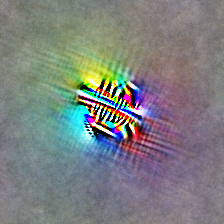

100%|██████████| 512/512 [00:04<00:00, 108.06it/s]



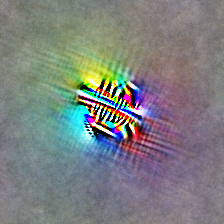

  2%|▏         | 11/512 [00:00<00:04, 108.93it/s]

Initial loss: -0.000


100%|█████████▉| 511/512 [00:04<00:00, 107.15it/s]

Loss at step 512: -195.986



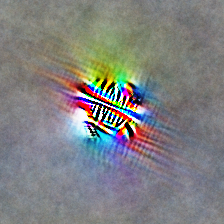

100%|██████████| 512/512 [00:04<00:00, 105.33it/s]



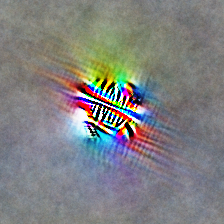

  2%|▏         | 11/512 [00:00<00:04, 108.19it/s]

9
Initial loss: -0.000


 99%|█████████▉| 509/512 [00:04<00:00, 105.41it/s]

Loss at step 512: -0.000



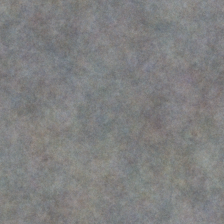

100%|██████████| 512/512 [00:04<00:00, 104.43it/s]



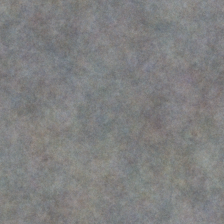

  2%|▏         | 11/512 [00:00<00:04, 107.92it/s]

Initial loss: -0.000


100%|█████████▉| 510/512 [00:04<00:00, 102.09it/s]

Loss at step 512: -0.000



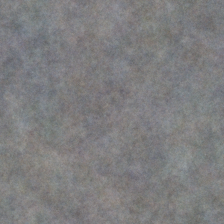

100%|██████████| 512/512 [00:04<00:00, 104.93it/s]



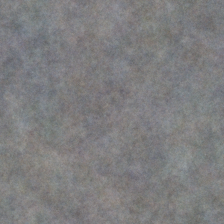

In [7]:
optimizer = lambda params: torch.optim.Adam(params, lr=5e-2)

standard_transforms = [
    transform.pad(12, mode="constant", constant_value=0.5),
    transform.jitter(8),
    transform.random_scale([1 + (i - 5) / 50.0 for i in range(11)]),
    transform.random_rotate(list(range(-10, 11)) + 5 * [0]),
    transform.jitter(4),
]


transforms = [
    transform.pad(12, mode="constant", constant_value=0.5),
    transform.jitter(12),
    transform.random_scale([1 + (i - 5) / 50.0 for i in range(11)]),
    transform.random_rotate(list(range(-10, 11)) + 5 * [0]),
    transform.jitter(8),
]

for i in range(10):
    print(i)
    param_f = lambda: param.image(224,sd=.1)
    obj1 = objectives.neuron("features_3", i)
    obj2 = objectives.neuron("features_4", i)
    #"features_0:0"
    _ = render.render_vis(model, obj1, param_f,optimizer = optimizer, verbose=True, show_inline=True)
    _ = render.render_vis(model, obj2, param_f,optimizer = optimizer, verbose=True, show_inline=True)



#image_name = regen_visualization(model_dis,'0',False,params)
# parametrizer = params['deepviz_param']
# optimizer = params['deepviz_optim']
# transforms = params['deepviz_transforms']
# image_size = params['deepviz_image_size']

# for i in range(500,510):
#     for neuron in [True,False]:
#         print('modelzoo')
#         objective = gen_objective(str(i),model,params,neuron=neuron)
#         _ = render.render_vis(model, objective, parametrizer, optimizer, transforms=transforms, show_inline=True)
#         print('alexnet')
#         objective = gen_objective(str(i),model2,params,neuron=neuron)
#         _ = render.render_vis(model2, objective, parametrizer, optimizer, transforms=transforms, show_inline=True)
#         print('model_dis')
#         objective = gen_objective(str(i),model_dis,params,neuron=neuron)
#         _ = render.render_vis(model_dis, objective, parametrizer, optimizer, transforms=transforms, show_inline=True)


In [13]:
param_f = lambda: param.image(224)
params, image_f = param_f()
params[0].shape

torch.Size([1, 3, 224, 113, 2])

In [ ]:
optimizer = lambda params: torch.optim.Adam(params, lr=5e-2)
for i in range(1):
    print(i)
    param_f = lambda: param.image(224)
    obj = objectives.channel("features_3", i)
    #"features_0:0"
    _ = render.render_vis(model, obj, param_f,optimizer = optimizer, verbose=True, show_inline=True)



In [ ]:
print(torch.__version__)

In [ ]:
get_model_layers(model_dis)
all_transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.random_rotate(list(range(-10,10)) + list(range(-5,5)) + 10*list(range(-2,2))),
    transform.jitter(2),
]


obj = "features_3_preadd_conv:999"
param_f = lambda: param.image(224, fft=True, decorrelate=True)
opt = lambda params: torch.optim.Adam(params, 5e-2)
_ = render.render_vis(model_dis, obj, param_f, opt,transforms=all_transforms, show_inline=True)
#_ = render.render_vis(model_dis, "features_3:9", show_inline=True)

In [ ]:
nodeid = 6

layer,within_layer_id,layer_name = nodeid_2_perlayerid(nodeid,params)    
image_name = fetch_deepviz_img(model_dis,str(nodeid),params)
image_path = params['prepped_model_path']+'/visualizations/images/'+image_name
image2plot(image_path,input_image_layout)

In [ ]:
#Input Image names
params['input_image_directory'] = prep_model_params.input_img_path+'/'
params['input_image_list'] = os.listdir(params['input_image_directory'])
params['input_image_list'].sort()
input_image_name = params['input_image_list'][0]

In [ ]:
rank_dict_2_df(get_model_ranks_from_image(get_image_path('Afghan_hound_10.JPEG',params)[1],'loss', model_dis, params))

In [ ]:
get_image_path('Afghan_hound_10.JPEG',params)

In [ ]:
print(layer_2_dissected_conv2d(5,alex_dis))
64*3

In [ ]:
alex_dis.features[0].add_indices

In [ ]:
l1= [1,2,3]
l2 = [4,5,6]
l1+l2

In [ ]:
os.listdir(params['input_image_directory'])
activations = get_model_activations_from_image(params['input_image_directory']+'jinrikisha_10078.JPEG', alex_dis, params)

In [ ]:
activations['edges_out']['jinrikisha_10078.JPEG'][0].shape

In [ ]:
for i in range(20):
    obj = "features_0:%s"%str(i)
    _ = render.render_vis(alex_dis, obj, verbose=True, show_inline=True)
#for i in range(20):
#    obj = "features_0_preadd_conv:%s"%str(i)
#    _ = render.render_vis(alex_dis, obj, show_inline=True)

In [ ]:
channel = lambda n: objectives.channel("features_7", n)
obj = channel(10) + channel(11)

In [ ]:
#load Model
googlenet = models.googlenet(pretrained=True)
googlenet_dis = dissect_model(googlenet,store_ranks=False,clear_ranks=False,cuda=True) #version of model with accessible preadd activations in Conv2d modules 
googlenet_dis.cuda()



In [ ]:
get_model_layers(googlenet_dis)

In [ ]:
for i in range(20):
    obj = "inception3a_branch2_1_conv_preadd_conv:%s"%str(i)
    _ = render.render_vis(googlenet_dis, obj, show_inline=True)
#for i in range(20):
#    obj = "features_0_preadd_conv:%s"%str(i)
#    _ = render.render_vis(alex_dis, obj, show_inline=True)

In [ ]:
obj

In [ ]:
channel(10)

In [ ]:
t = torch.rand(2,250,28,28)
import time

In [ ]:
ti = time.time()
t_numpy = t.numpy()
print(time.time()-ti)

In [ ]:
t.requires_grad =True

In [ ]:
t.grad

In [ ]:
s = 2; y=4

In [ ]:
#fetch command line argument (prepped model)
#%reset
import sys
import os
from copy import deepcopy
import pickle
import torch
import plotly.offline as py
import plotly.graph_objs as go

from lucent.optvis import render
from lucent.modelzoo import inceptionv1
from lucent.modelzoo.util import get_model_layers
from torchvision import models

sys.path.insert(0, os.path.abspath('./prep_model_scripts/'))
sys.path.insert(0, os.path.abspath('./visualizer_scripts/'))
from visualizer_helper_functions import *
from contrast_helper_functions import *
from dissected_Conv2d import *
from copy import deepcopy

py.init_notebook_mode(connected=True)   #jupyter notebook only

prepped_model_folder = 'alexnet'    #set this to a subfolder of prunned_models

full_prepped_model_folder = os.path.abspath('prepped_models/%s'%prepped_model_folder)

possible_models = os.listdir('prepped_models')
print('possible models to visualizer are:')
print(possible_models)

print('\nYou\'ve chosen to visualize %s'%prepped_model_folder)


sys.path.insert(0,'prepped_models/%s'%prepped_model_folder)

import prep_model_params_used as prep_model_params

In [ ]:
#Parameters
params = {}
#Non-GUI parameters

#backend
params['cuda'] = prep_model_params.cuda    #use gpu acceleration when running model forward
params['input_image_directory'] = prep_model_params.input_img_path+'/'   #path to directory of imput images you want fed through the network
params['preprocess'] = prep_model_params.preprocess     #torchvision transfrom to pass input images through
params['label_file_path'] = prep_model_params.label_file_path
params['criterion'] = prep_model_params.criterion
#params['dynamic_act_cache_num'] = 4  #max number of input image activations 'dynamic_activations' will have simultaneously

 
#aesthetic 

params['node_size'] = 12
params['edge_size'] = 1
params['max_node_inputs'] = 20    #there is a dropdown showing the top weighted edge inputs to nodes, how many maps in dropdown?
params['layer_colors'] = ['rgba(31,119,180,', 
                          'rgba(255,127,14,',
                          'rgba(44,160,44,', 
                          'rgba(214,39,40,',
                          'rgba(39, 208, 214,', 
                          'rgba(242, 250, 17,',
                          'rgba(196, 94, 255,',
                          'rgba(193, 245, 5,',
                          'rgba(245, 85, 5,',
                          'rgba(5, 165, 245,',
                          'rgba(245, 5, 105,',
                          'rgba(218, 232, 23,',
                          'rgba(148, 23, 232,',
                          'rgba(23, 232, 166,',]




#GUI parameters initialization (these parameters can be set in the GUI, but what values should they be initialized to?)
target_category = 'overall'     #category of images edges and nodes are weighted based on (which subgraph) 
rank_type = 'actxgrad'       #weighting criterion (actxgrad, act, grad, or weight)
projection = 'MDS'           #how nodes within a layer are projected into the 2d plane (MDS or Grid)
edge_threshold = [.1,1]     #what range do edge ranks need to be in to be visualized


#### DONT EDIT BELOW initializations

figure_init = go.Figure()
figure_init.add_trace(go.Scatter(
            x=[],
            y=[]))
figure_init.update_layout(xaxis=dict(visible=False),
                  yaxis=dict(visible=False),
                  annotations = [dict(text="No Inputs",
                                      xref="paper",
                                      yref="paper",
                                      showarrow=False,
                                      font=dict(size=28))]
                 )

params['max_edge_weight'] = 1  #for the edge threshold slider, this dynamically adjusted its max value to max edge rank
                     #before there were multiple rank criterions, which made things confusing
                     #so well just fix it to 1 for now

In [ ]:
#load Model

model_dis = dissect_model(deepcopy(prep_model_params.model),store_ranks=True,clear_ranks=True,cuda=params['cuda']) #version of model with accessible preadd activations in Conv2d modules 
if params['cuda']:
    model_dis.cuda()
#print('loaded model:')
#print(prep_model_params.model)
        
#del prep_model_params.model

model = prep_model_params.model
model_dis


In [ ]:
model_dis.features[10].name

In [ ]:
list(model.children())

In [ ]:
def add(l):
    s=0
    for i in l:
        s+=i
    return s

add([2].append(5))

In [ ]:
print([2].append(5))

In [ ]:
l = [2]
l.append(5)

In [ ]:
l

In [ ]:
add(l.append(5))

In [ ]:
l

In [ ]:
'_'.join(['thing'])


In [ ]:
l = []
l.append(None)
l

In [ ]:
"_".join([])

In [ ]:
l=[]
x = l.append('something')

In [ ]:
x = 's'
l= [1,2]
l+[x]

In [ ]:
with open('somefile.txt', 'a') as the_file:
    the_file.write('Hello\n')

In [ ]:
import pandas as pd
cols = ['a','b','c']
ls = [[1,2,3],[0,0,0],[0,0,0]]
df = pd.DataFrame(ls,columns=cols)
df_sel = df.loc[(df['a'] == 2) & (df['b'] == 0)]

In [ ]:
len(df_sel)

In [ ]:
len(df_sel)

In [ ]:
df_sel.iloc[0]['a']

In [ ]:
import inspect

def in_func(thing):
    return inspect.getsource(thing).replace('times2 = ','')
    
times2 = lambda y: y*2
params={}
params['thing']=times2

in_func(params['thing'])